<a href="https://colab.research.google.com/github/taguatero/GOb/blob/master/Caso_de_las_bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar los paquetes que se utilizarán en este código

In [ ]:
install.packages("stargazer")
install.packages("FNN")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#Si desea correr el código deberá cargar el archivo en las opciones de la izquierda
#<-- Subir el documento bikes con extensión .csv
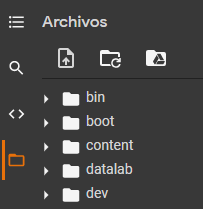

### Link al archivo: https://drive.google.com/file/d/1O-PiTHt36pPdkdCasSxsLPDc-oowb1uh/view?usp=sharing

In [232]:
# ------------------------- Pipeline VC para modelo de k-vecinos --------------#
rm(list=ls()) # Limpiamos la memoria.
dev.off()     # Limpiamos la ventana grÃ¡fica

library(FNN)  # Cargamos la/s librerÃ­a/s que necesitamos utilizar.
library(stargazer)

#------ Modelo de regresiÃ³n NO lineal para datos de demanda de bicicletas  ----# 
datos = read.table('/bikes.csv',
                   sep=',',
                   header=T,
                   dec='.',
                   na.strings = "NA")
attach(datos) # atachamos las variables del data frame en R.
              # facilita que puedas "llamar" a las variables por su nombre


null device 
          1

The following objects are masked from datos (pos = 3):

    atemp, casual, cnt, dteday, holiday, hum, instant, mnth,
    registered, season, temp, weathersit, weekday, windspeed,
    workingday, yr


The following objects are masked from datos (pos = 4):

    atemp, casual, cnt, dteday, holiday, hum, instant, mnth,
    registered, season, temp, weathersit, weekday, windspeed,
    workingday, yr


The following objects are masked from datos (pos = 5):

    atemp, casual, cnt, dteday, holiday, hum, instant, mnth,
    registered, season, temp, weathersit, weekday, windspeed,
    workingday, yr


The following objects are masked from datos (pos = 6):

    atemp, casual, cnt, dteday, holiday, hum, instant, mnth,
    registered, season, temp, weathersit, weekday, windspeed,
    workingday, yr


The following objects are masked from datos (pos = 7):

    atemp, casual, cnt, dteday, holiday, hum, instant, mnth,
    registered, season, temp, weathersit, weekday, windspeed,
    workingday, yr





#### Diccionario de variables:
instant: record index
* dteday : date
* season : season (1:winter, 2:spring, 3:summer, 4:fall)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday (1) or not (0).
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit: 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered


No utilizamos un data set de TEST en este ejercicio porque sólo nos interesa
seleccionar modelo (elegir un valor razonable para 'k'). Eventualmente también
podríamos estar interesados en estimar el ecm del modelo seleccionado, en ese
caso antes de comenzar necesitamos separar una parte de los datos como conjunto de test.


# k-vecinos y Validation Set Approach:    


[1] 731

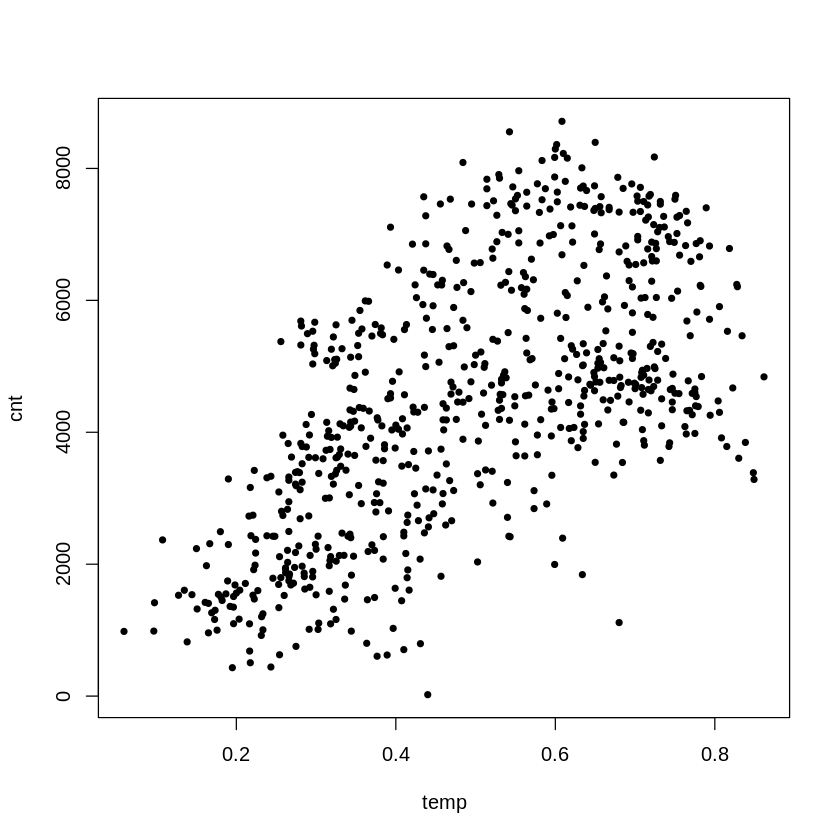

[1] 21

valores.k,,
1,15.12149,12.66219
6,14.60940,12.44676
11,14.59134,12.44655
16,14.57687,12.50507
21,14.55452,12.51398
26,14.53926,12.48989
31,14.54059,12.35257
36,14.53867,12.30773
41,14.54341,12.41963
46,14.54632,12.45546


[1] 36

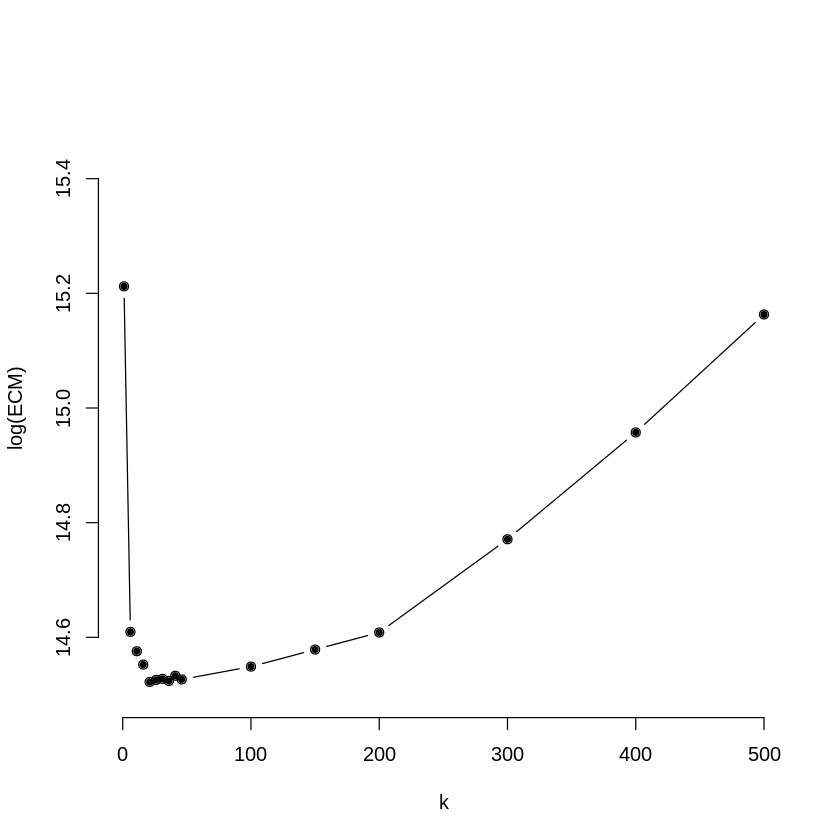

In [233]:
###################################################################################
plot(temp,cnt,pch=20) # Vamos a trabajar solo con 1 variable para poder visualizar!
#@ Vamos a construÃ­r un modelo predictivo para la demanda de bicis (cnt) en funciÃ³n de 
#  la temperatura (para poder visualizar el fitting), luego agregamos mas co-variables.
###################################################################################
# (1) Separar los datos en TRAIN y VALIDACIÃN:
length(cnt) # 731 datos.
set.seed(321)
train.id = sample(731,500) # 500 obs train y 231 test.

train.X = matrix(temp[train.id],ncol=1)   
train.Y = matrix(cnt[train.id],ncol=1)   

test.X = matrix(temp[-train.id],ncol=1)   
test.Y = matrix(cnt[-train.id],ncol=1)   

#@@@ EstimaciÃ³n del hiper--parÃ¡metro "k":
valores.k = c(seq(1,50,by=5),100,150,200,300,400,500)
ECM = c() # AquÃ­ guardaremos los ECM
for(i in 1:length(valores.k)){
  kNN.Univ = knn.reg(train = train.X , 
                     test = test.X, 
                     y = train.Y , 
                     k = valores.k[i]) # <- mira esta lÃ­nea!
  ECM[i] = sum( (test.Y - kNN.Univ$pred)^2 ) / 231
}

# Log del ecm estimado con conjunto de validaciÃ³n vs. "k" 
plot(valores.k,log(ECM) ,type='b',pch=20, main='', xlab = 'k', ylim = c(14.5,15.5), bty = 'n') 

valores.k[which(ECM == min(ECM))] # k* = 21 (aprendido por Val-Set approach).

############################################################
########## 5--fold cross validation:   #####################
############################################################

# Creo una variable que indica a que fold pertenece cada dato:
fold.id <- cut(seq(1,731),breaks=5,labels=FALSE)

set.seed(1)
fold.id <- sample(fold.id, size = 731, replace = FALSE)

ECM.prom = c(); # 
ECM.sd = c();   # Para cada valor del parÃ¡metro computamos el sd del estimador del ECME
for(i in 1:length(valores.k)){ # i recorre los posibles valores del parÃ¡metro k.
  ECM.b = c()
  for(b in 1:5){ # b-recorre los folds
    index.train = which(fold.id!=b) # "b" recorre los folds.
    index.test  = which(fold.id==b) 
    
  kNN.Univ = knn.reg(train = as.matrix(temp[index.train]) , 
                      test = as.matrix(temp[index.test]) , 
                         y = as.matrix(cnt[index.train]) , 
                         k = valores.k[i]) # i recorre valores del parÃ¡metro k
  ECM.b[b] = sum( (cnt[index.test] - kNN.Univ$pred)^2 ) / length(index.test)
}
  ECM.prom[i] = mean(ECM.b); 
  ECM.sd[i]   = sd(ECM.b);
}

cbind(valores.k,log(ECM.prom),log(ECM.sd))
points(valores.k,log(ECM))
valores.k[which(ECM.prom == min(ECM.prom))] # k* = 46 (aprendido por 5 folds-VC).


                        Dependent variable:    
                    ---------------------------
                                cnt            
-----------------------------------------------
temp                       6,425.800***        
                             (367.729)         
                                               
Constant                   1,333.091***        
                             (195.965)         
                                               
-----------------------------------------------
Observations                    500            
R2                             0.380           
Adjusted R2                    0.379           
Residual Std. Error    1,518.275 (df = 498)    
F Statistic          305.350*** (df = 1; 498)  
Note:               *p<0.1; **p<0.05; ***p<0.01


[1] 14.61554

[1] 14.53867

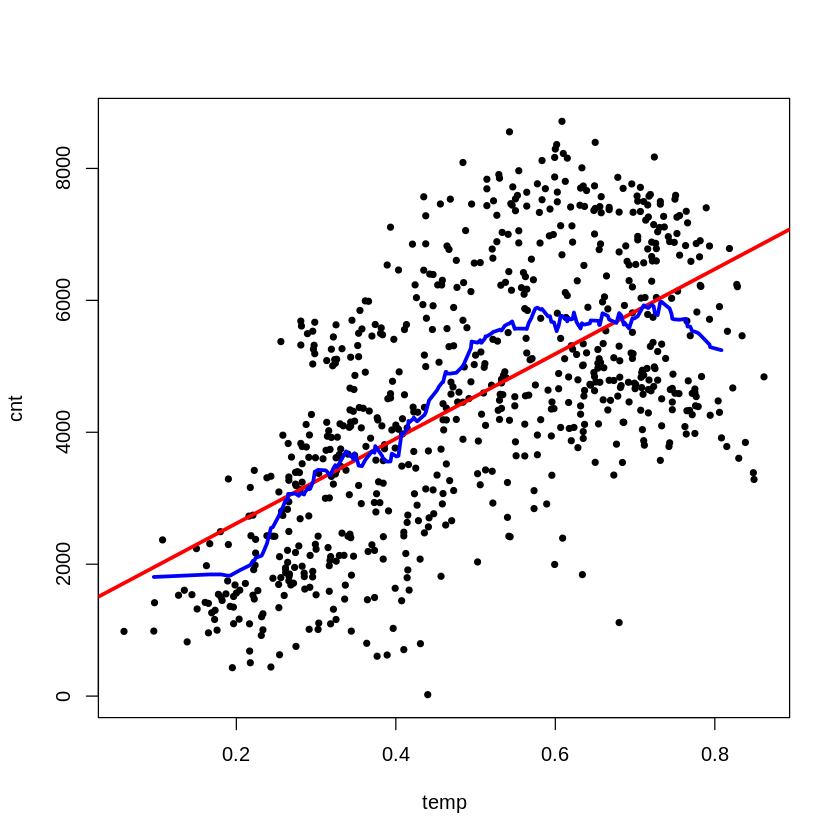

In [235]:
################################################################################## FIN.
############################################################
# Modelo lineal (benchmark) vs Reg con k=46 vecinos:
cnt.reglin = lm(cnt~temp, subset = train.id)
stargazer(cnt.reglin,type="text") # sqrt(mse) en train = 1500
plot(temp,cnt,pch=20) 
abline(cnt.reglin, col='red', lwd = 3)

kNN.k_46 = knn.reg(train = as.matrix(temp[train.id]) , test = as.matrix(temp[-train.id]), 
                   y = as.matrix(cnt[train.id]), k = 46)
predicciones.ordenadas = cbind(temp[-train.id], kNN.k_46$pred) 
predicciones.ordenadas = predicciones.ordenadas[order(predicciones.ordenadas[,1], 
                                                      decreasing = TRUE),] 
points(predicciones.ordenadas, type='l', col = 'blue', lwd = 3)

# Comparativas de ECM (escala logarÃ­tmica sobre conjunto de validaciÃ³n).
pred.cnt.reglin = predict(cnt.reglin, newdata = data.frame(temp = temp[-train.id]))
log(sum((pred.cnt.reglin - cnt[-train.id])^2  )/ 231)  # sqrt(ecm) fuera de la muestra.

min(log(ECM.prom))



# Queda a cargo del alumno extender este ejercicio para incluí­r otros features la función de regresión de la demanda de bicicletas (explora la ayuda del comando knn.reg)


Observaremos las variables que podríamos incluir al modelo para hacer una predicción mejor.

In [ ]:
str(datos)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr  "2011-01-01" "2011-01-02" "2011-01-03" "2011-01-04" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


Considero que los días laborales, las estaciones, la temperatura y el mes podrían ayudar 

In [291]:
# Selecciono las variables que me interesarían introducir al modelo.
ploteando=cbind(workingday,weekday,atemp,hum, season, temp, mnth,windspeed,weathersit)

## No será posible realizar un gráfico de dispersión porque se utilizarán *p* cantidad de variables.

Se pasa a graficiar las variables que consideramos que podrían influir en el alquiler de la bicicleta

[1] "Vamos a graficar la relación con distintas variables"

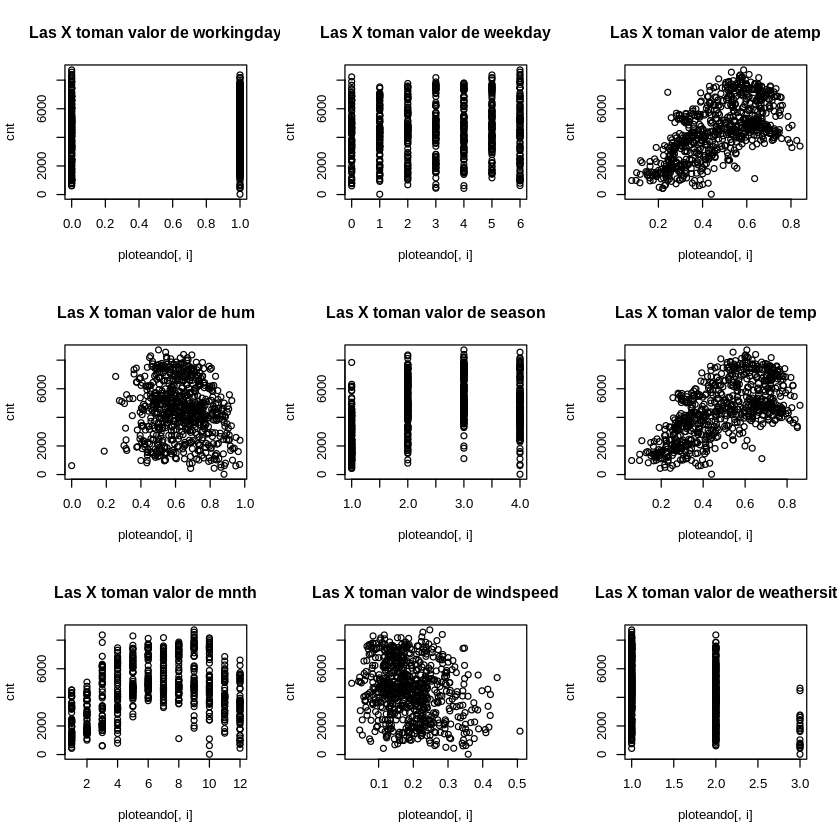

In [306]:
par(mfrow=c(3,3)) # Generamos un gr?fico que nos permita agrupar las 8 distribuciones de densidad.
nombres=colnames(ploteando)
paste("Vamos a graficar la relación con distintas variables")
for (i in 1:length(nombres)) {
  plot(cnt~ploteando[,i],
        main=paste("Las X toman valor de",sep=" ",nombres[i]))
}

In [307]:
# Selecciono las variables que me interesarían introducir al modelo.
mk=cbind(weekday,atemp, season, temp, mnth,windspeed,weathersit)

[1] 731

[1] 16

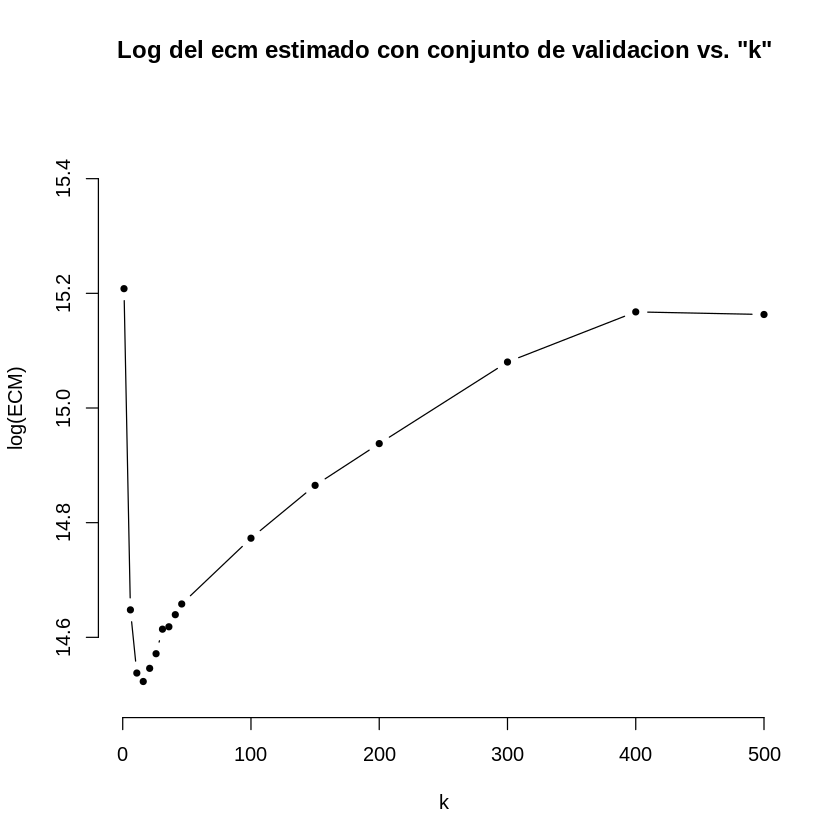

In [308]:
# (1) Separar los datos en TRAIN y VALIDACIÃN:
length(cnt) # 731 datos.
set.seed(321)
train.id = sample(731,500) # 500 obs train y 231 test.

mk.train.X = as.matrix(mk[train.id,])   
train.Y = matrix(cnt[train.id],ncol=1)   

mk.test.X = as.matrix(mk[-train.id,])   
test.Y = matrix(cnt[-train.id],ncol=1)   

#@@@ EstimaciÃ³n del hiper--parÃ¡metro "k":
valores.k = c(seq(1,50,by=5),100,150,200,300,400,500)
ECM = c() # AquÃ­ guardaremos los ECM
for(i in 1:length(valores.k)){
  kNN.Univ = knn.reg(train = mk.train.X , 
                     test = mk.test.X, 
                     y = train.Y , 
                     k = valores.k[i]) # <- mira esta lÃ­nea!
  ECM[i] = sum( (test.Y - kNN.Univ$pred)^2 ) / 231 
}

#  
plot(valores.k,log(ECM) ,type='b',pch=20, main='Log del ecm estimado con conjunto de validacion vs. "k"', xlab = 'k', ylim = c(14.5,15.5), bty = 'n') 

valores.k[which(ECM == min(ECM))] # k* = 21 (aprendido por Val-Set approach).

In [311]:
############################################################
########## 5--fold cross validation:   #####################
############################################################
# Creo una variable que indica a que fold pertenece cada dato:
fold.id <- cut(seq(1,731),breaks=5,labels=FALSE)
 # Conviene permutar de forma aleatoria los elementos de este vector.

set.seed(1)
fold.id <- sample(fold.id, size = 731, replace = FALSE)

ECM.prom = c(); # Para cada valor del parÃ¡metro computamos el promedio de 10 estimaciones del ECME
ECM.sd = c();   # Para cada valor del parÃ¡metro computamos el sd del estimador del ECME
for(i in 1:length(valores.k)){ # i recorre los posibles valores del parÃ¡metro k.
  ECM.b = c()
  for(b in 1:5){ # b-recorre los folds
    index.train = which(fold.id!=b) # "b" recorre los folds.
    index.test  = which(fold.id==b) 
  kNN.Univ = knn.reg(train = as.matrix(mk[index.train,]) , 
                      test = as.matrix(mk[index.test,]) , 
                         y = as.matrix(cnt[index.train]) , 
                         k = valores.k[i]) # i recorre valores del parÃ¡metro k
  ECM.b[b] = sum( (cnt[index.test] - kNN.Univ$pred)^2 ) / length(index.test)
}
  ECM.prom[i] = mean(ECM.b); 
  ECM.sd[i]   = sd(ECM.b) 
}

cbind(valores.k,log(ECM.prom),log(ECM.sd))
paste("Valor de K que genera el ECM mas bajo")
valores.k[which(ECM.prom == min(ECM.prom))] # k* = 46 (aprendido por 5 folds-VC).


valores.k,,
1,15.05703,12.56366
6,14.50615,12.24373
11,14.45064,11.95326
16,14.50486,12.46804
21,14.50975,12.47414
26,14.52611,12.43531
31,14.56260,12.38830
36,14.58393,12.36513
41,14.60495,12.38171
46,14.61227,12.30555


[1] "Valor de K que genera el ECM mas bajo"

[1] 11

In [313]:
# Modelo lineal (benchmark):
cnt.reglin = lm(cnt~weekday + season + temp + mnth, subset = train.id)
stargazer(cnt.reglin,type="text",title="Regresión lineal benchmark") # sqrt(mse) en train = 1500

# modelo con k=50
kNN.k_50 = knn.reg(train = as.matrix(mk[train.id,]), 
                   test = as.matrix(mk[-train.id,]), 
                   y = as.matrix(cnt[train.id]), k = 50)
predicciones.ordenadas = cbind(cnt[-train.id], kNN.k_50$pred) 
predicciones.ordenadas = predicciones.ordenadas[order(predicciones.ordenadas[,1], 
                                                      decreasing = TRUE),] 


Regresión lineal benchmark
                        Dependent variable:    
                    ---------------------------
                                cnt            
-----------------------------------------------
weekday                       35.339           
                             (33.225)          
                                               
season                      484.108***         
                             (119.148)         
                                               
temp                       5,641.555***        
                             (379.186)         
                                               
mnth                          -41.192          
                             (37.464)          
                                               
Constant                    671.079***         
                             (234.727)         
                                               
-----------------------------------------------
Observations

In [314]:
data=data.frame(mk[-train.id,])

### A continuación se realiza la comparación entre el modelo que iteraba distintos valores de K vs el modelo de regresión lineal.



In [316]:
# Comparativas de ECM (escala logarÃ­tmica sobre conjunto de validaciÃ³n).
pred.cnt.reglin = predict(cnt.reglin, newdata = data)

tabla=t(matrix(c("ECM de la regresión lineal junto a validación:     ",
        log(sum((pred.cnt.reglin - cnt[-train.id])^2  )/ 231),
        "ECM promedio de las iteraciones con distintos valores de K de 1:500:     ",
        min(log(ECM.prom)), 
        "ECM del último modelo que se realizó con K= 50:     ",log(sum((kNN.k_50$pred - cnt[-train.id])^2)/ 231)),nrow=2))

paste("notar que el menor valor es mediante K=11")
tabla


[1] "notar que el menor valor es mediante K=11"

ECM de la regresión lineal junto a validación:,14.5040413731558
ECM promedio de las iteraciones con distintos valores de K de 1:500:,14.4506434023039
ECM del último modelo que se realizó con K= 50:,14.6803871127666
